In [50]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset,DataLoader

In [51]:
torch.manual_seed(1)

In [52]:

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [53]:
a = torch.zeros(20,2)
a[:,0] = torch.arange(-1,1,0.1)
a

tensor([[-1.0000,  0.0000],
        [-0.9000,  0.0000],
        [-0.8000,  0.0000],
        [-0.7000,  0.0000],
        [-0.6000,  0.0000],
        [-0.5000,  0.0000],
        [-0.4000,  0.0000],
        [-0.3000,  0.0000],
        [-0.2000,  0.0000],
        [-0.1000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.1000,  0.0000],
        [ 0.2000,  0.0000],
        [ 0.3000,  0.0000],
        [ 0.4000,  0.0000],
        [ 0.5000,  0.0000],
        [ 0.6000,  0.0000],
        [ 0.7000,  0.0000],
        [ 0.8000,  0.0000],
        [ 0.9000,  0.0000]])

In [54]:
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0],[1.0]])
        self.b = 1
        self.f = torch.mm(self.x,self.w) + self.b
        self.y = self.f + 0.1 * torch.randn(self.x.shape[0],1)
        self.len = self.x.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [55]:
data_set = Data2D()

In [56]:
class linear_regression(nn.Module):
    def __init__(self,inp_size,out_size):
        super(linear_regression,self).__init__()
        self.linear = nn.Linear(inp_size,out_size)
        
    def forward(self,x):
        yhat = self.linear(x)
        return yhat

In [57]:
model = linear_regression(2,1)

In [58]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.6209, -0.1178]], requires_grad=True),
 Parameter containing:
 tensor([0.3026], requires_grad=True)]

In [59]:
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [60]:
criterion = nn.MSELoss()

In [61]:
train_loader = DataLoader(dataset=data_set,batch_size=2)

Before Training:


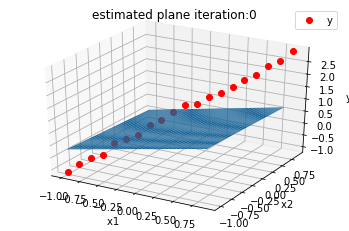

After Training:


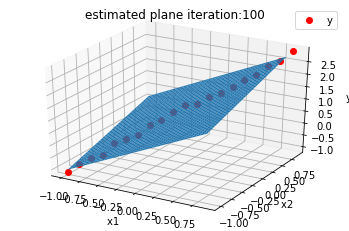

In [62]:
#Train the Model
LOSS = []
print('Before Training:')
#plot model ie, the y generated with input data
Plot_2D_Plane(model,data_set)
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        # [[x10,x11],[x20,x22]] = [[y1],[y2]]
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat,y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print('After Training:')
Plot_2D_Plane(model,data_set,epochs)
            
        


In [63]:
data_set1 = Data2D()
model1 = linear_regression(2,1)
data_loader1 = DataLoader(dataset=data_set1,batch_size=3)

Before Training:


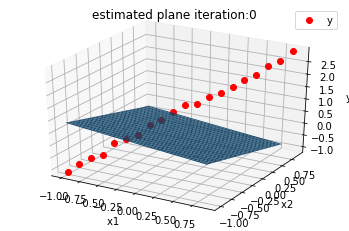

After Training:


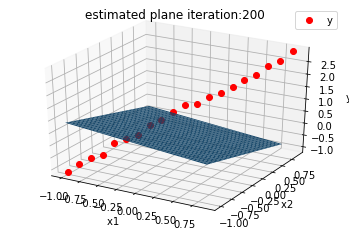

In [68]:
print('Before Training:')
#plot model ie, the y generated with input data
Plot_2D_Plane(model1,data_set1)
epochs = 200
def train_model1(epochs):
    for epoch in range(epochs):
        for x,y in data_loader1:
            yhat = model1(x)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model1(epochs)
print('After Training:')
Plot_2D_Plane(model1,data_set1,epochs)

In [65]:
torch.manual_seed(2)

In [66]:
validation_data = Data2D()
X = validation_data.x
Y = validation_data.y

In [70]:
print("Loss of model:",criterion(model(X),Y))
print("Loss of model1:",criterion(model1(X),Y))

Loss of model: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss of model1: tensor(3.6634, grad_fn=<MseLossBackward>)
